In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [10]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Today Date
session.query(Measurement.date).order_by(Measurement.date.desc()).all()


[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

In [14]:
# Calculate the date 1 year ago from today
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-23','2017-08-23')).order_by(Measurement.date.asc()).all()

date = [result[0] for result in results]
prcp = [result[1] for result in results]

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)



<IPython.core.display.Javascript object>


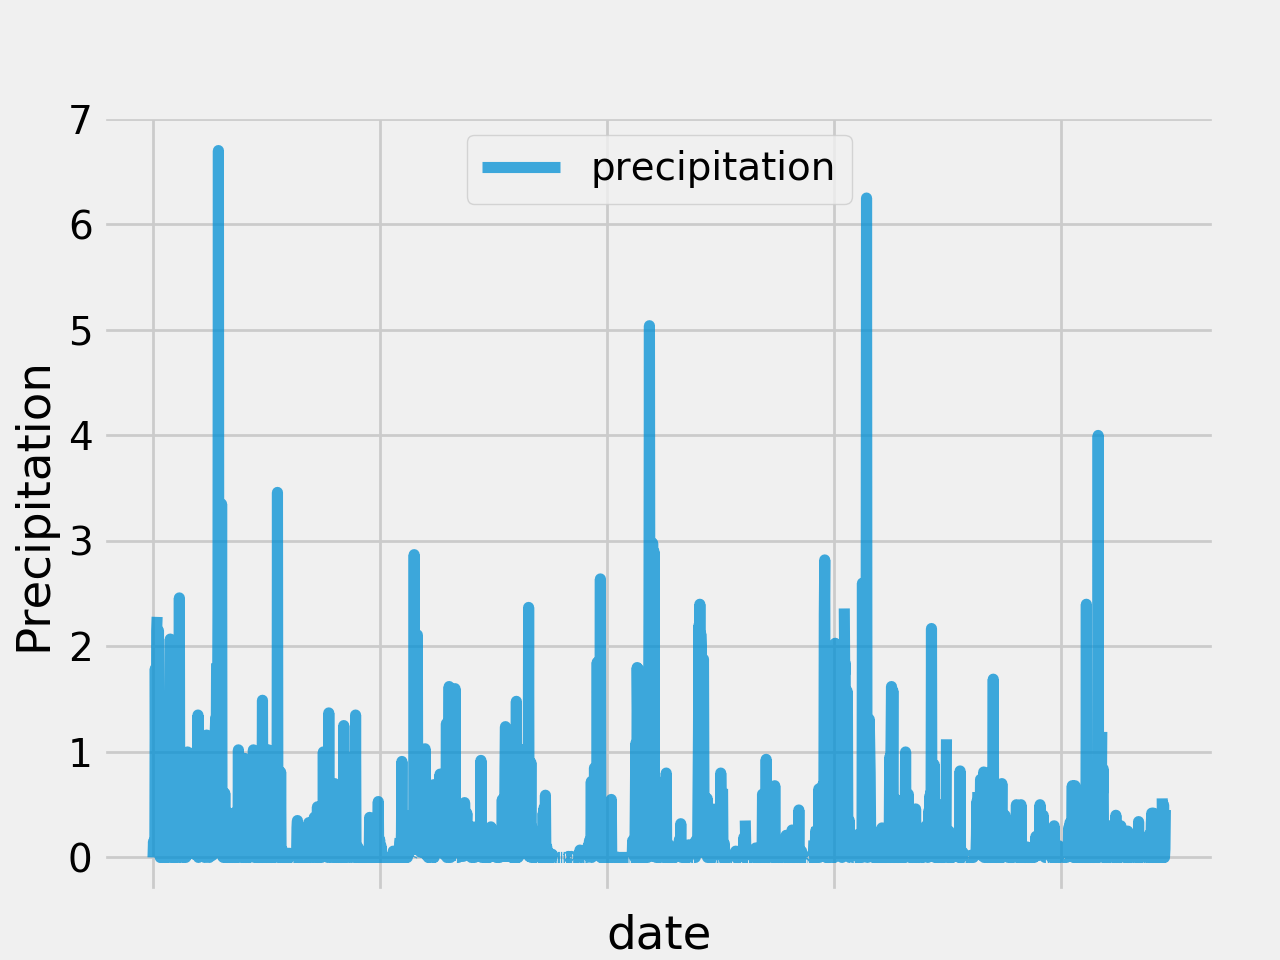

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
df.plot(kind='line',alpha=0.75, rot = 45)

plt.xlabel("date")
plt.ylabel("Precipitation")

plt.savefig('Images/PrecipitationFigure.pdf')
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# How many stations are available in this dataset?
session.query(Station.id).count()
    

9

In [19]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [20]:
# What are the most active stations?
# List the stations and the counts in descending order.

stations = session.query(Measurement.id, Measurement.station).all()

id = [station[0] for station in stations]
station = [station[1] for station in stations]

station_df = pd.DataFrame(stations, columns=['id', 'station'])
station_df.head()

station_count = station_df.groupby(['station'])
station_count.count().sort_values(['id'], ascending=False)


#Station USC00519281 has the most observations. 

,id
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [21]:
stations_temps = session.query(Measurement.id, Measurement.station, Measurement.tobs).filter_by(station='USC00519281').all()


id = [stations_temp[0] for stations_temp in stations_temps]
station = [stations_temp[1] for stations_temp in stations_temps]
temp = [stations_temp[2] for stations_temp in stations_temps]

station_temp = pd.DataFrame(stations_temps, columns=['id', 'station', 'temp'])
station_temp.head()


,id,station,temp
0,12188,USC00519281,70.0
1,12189,USC00519281,62.0
2,12190,USC00519281,74.0
3,12191,USC00519281,75.0
4,12192,USC00519281,74.0


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature most active station?
#lowest temperature
station_temp['temp'].min()


54.0

In [23]:
#highest_temperature
station_temp['temp'].max()

85.0

In [24]:
#average_temperature
station_temp['temp'].mean()

71.66378066378067

In [25]:
# Choose the station with the highest number of temperature observations.
highest_stations = session.query(Measurement.date,Measurement.tobs, Measurement.station).all()

date_a = [highest_station[0] for highest_station in highest_stations]
temp_a = [highest_station[1] for highest_station in highest_stations]
station_a = [highest_station[2] for highest_station in highest_stations]

active_df = pd.DataFrame(highest_stations, columns= ['date', 'temp', 'station'])
active_df.head()

active_count = active_df.groupby(['station'])
active_count.count().sort_values(['temp'], ascending=False)

#USC00519281 has the most observations overall. 

,date,temp
station,,
USC00519281,2772,2772
USC00519397,2724,2724
USC00513117,2709,2709
USC00519523,2669,2669
USC00516128,2612,2612
USC00514830,2202,2202
USC00511918,1979,1979
USC00517948,1372,1372
USC00518838,511,511


In [26]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_temps = session.query(Measurement.date,Measurement.tobs, Measurement.station)\
        .filter(Measurement.date.between('2016-08-23','2017-08-23'))\
        .filter_by(station='USC00519281')\
        .order_by(Measurement.date.asc()).all()

id_h = [highest_temp[0] for highest_temp in highest_temps]
date_h = [highest_temp[1] for highest_temp in highest_temps]
temp_h = [highest_temp[2] for highest_temp in highest_temps]

highest_temps_df = pd.DataFrame(highest_temps, columns=['date', 'temp', 'station'])
highest_temps_df.head()

,date,temp,station
0,2016-08-23,77.0,USC00519281
1,2016-08-24,77.0,USC00519281
2,2016-08-25,80.0,USC00519281
3,2016-08-26,80.0,USC00519281
4,2016-08-27,75.0,USC00519281


In [27]:
#Find the limits for the bins
highest_temps_df.min() #59
highest_temps_df.max() #83
highest_temps_df.mean() #73

temp    73.107955
dtype: float64

In [38]:
#create 12 bins 
bins = [ 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83]
#group_names = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

group_names = [60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82]

highest_temps_df["Frequency"] = pd.cut(highest_temps_df["temp"], bins, labels=group_names)
highest_temps_df

highest_temps_groups = highest_temps_df[['temp']]
highest_temps_groups
#groups = highest_temps_groups.groupby(["Frequency"]).count()


#groups

,temp
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
5,73.0
6,78.0
7,77.0
8,78.0
9,80.0


<IPython.core.display.Javascript object>


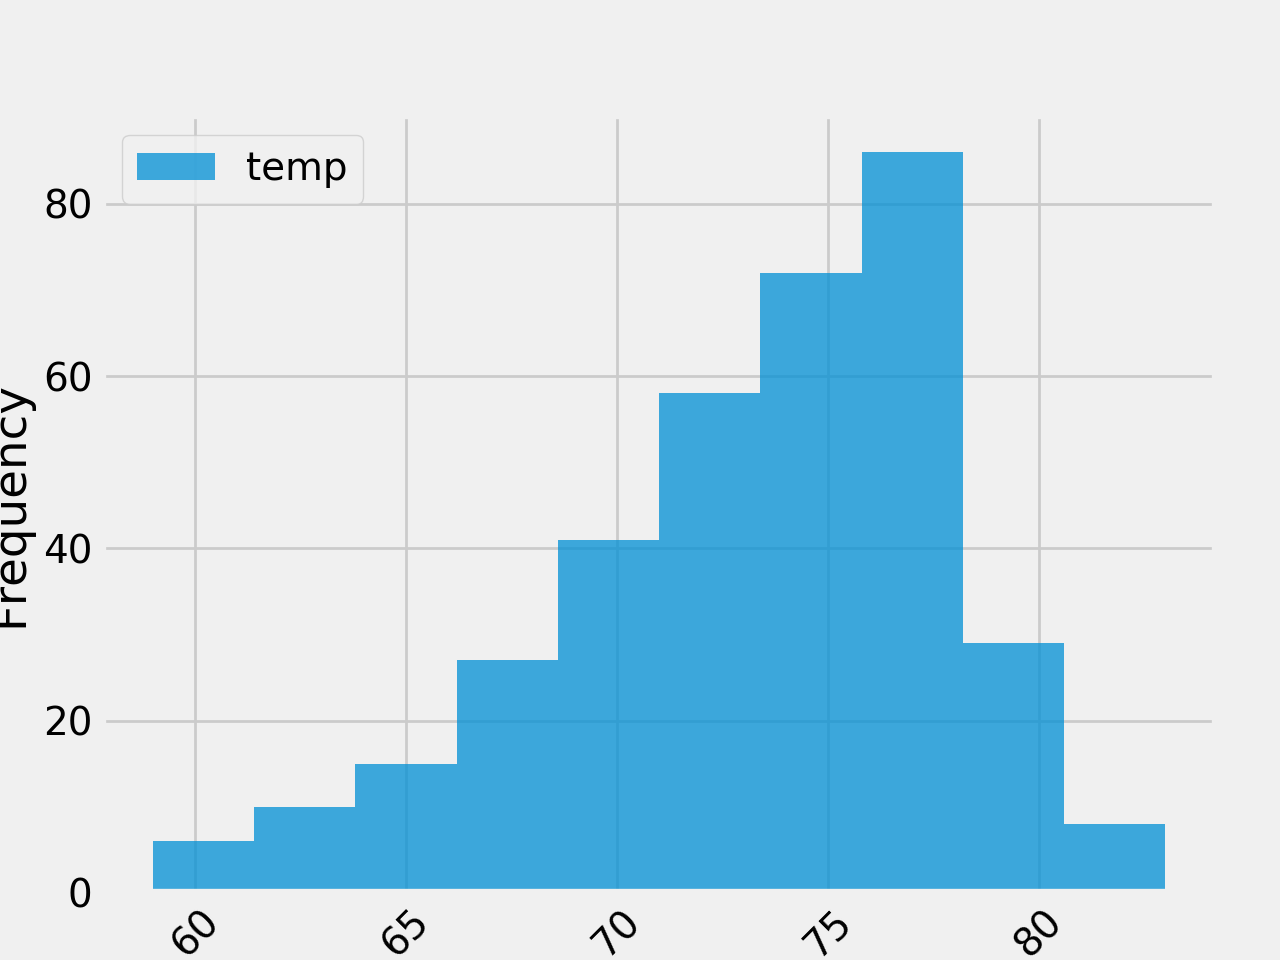

In [39]:
#plot the results as a histogram
#plt.bar(groups['temp'], frequency, color='r', alpha=0.5)
#plt.title("Temperature at Station USC00519397")
#plt.show()

highest_temps_groups.plot(kind='hist', alpha=0.75, rot = 45)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.savefig('Images/TemperatureFrequency.pdf')
plt.show()